In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import os
import glob
import time
from collections import deque
from moviepy.editor import VideoFileClip
from helperfunctions import *
from svmclassifier import *
%matplotlib inline
print('Loaded')

Loaded


In [2]:
# Read training data 
# Car
cars_files_png = glob.glob('C://big/p5/vehicles/**/*.png', recursive=True)
cars_files_jpg = glob.glob('C://big/p5/vehicles/**/*.jpg', recursive=True)
# Not Car
notcars_files = glob.glob('C://big/p5/non-vehicles/**/*.png', recursive=True)

# store filenames in cars,notcars
cars=[]
notcars=[]
# search through readed data 
# read every third image to split time-series of images
for n in range(len(cars_files_jpg)):
    if n % 2 == 0:
        cars.append(cars_files_jpg[n])
for n in range(len(cars_files_png)):
    if n % 2 == 0:
        cars.append(cars_files_png[n])
        
#print(cars)

# Do the same for non-car data
for n in range(len(notcars_files)):
    if n % 1 == 0:
        notcars.append(notcars_files[n])
        
print('Cars size is: ',np.shape(cars))
print('Not-Cars size is: ',np.shape(notcars))

Cars size is:  (4695,)
Not-Cars size is:  (8968,)


In [3]:
folder = 'test'
(folder + '/**/*.png')

'test/**/*.png'

In [4]:
# Feature extraction parameters
colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
cspace = colorspace # sometimes functions uses this abreviation
orient = 11
pix_per_cell = 16
cell_per_block = 2
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size=(32,32)
hist_bins = 16 # Errors out when trying to modify


'''
If recompute = True:
    Re-extracts the features for pickle
    set this to true if changing parameters
'''
recompute = True
# Extract the features, then save a pickle file
fname = 'X_scaler_scaled_X_y.p'
if os.path.isfile(fname) == True and recompute == False:
    print('Already Extracted, got my pickle')
    pass
else:
    pickle_extracted_features('X_scaler_scaled_X_y.p',cars,notcars,colorspace,orient,
                          pix_per_cell,cell_per_block,hog_channel,spatial_size,hist_bins)

# Test training_with_SVM()
training_with_SVM('X_scaler_scaled_X_y.p')

pickle ext colorspace is  YCrCb
 Seconds to extract features:  43.32
before scale cars 3.16764707623and length (4695, 4308)
before scale3.17209164103
after  5.27884584741e-17
The input was: colorspace = YCrCb, orient = 11,    pix_per_cell = 16, cell_per_block = 2
Extracted features are stored in pickled file:X_scaler_scaled_X_y.p
12.06 Seconds to train SVC
Test Accuracy of SVC =  0.9885
Model saved as [ svc.pickle ] file
My SVC predictions: 
 [ 1.  0.  0.  1.  1.  1.  1.  1.  1.  0.]
For  10 labels: 
 [ 1.  0.  0.  1.  1.  1.  1.  1.  1.  0.]


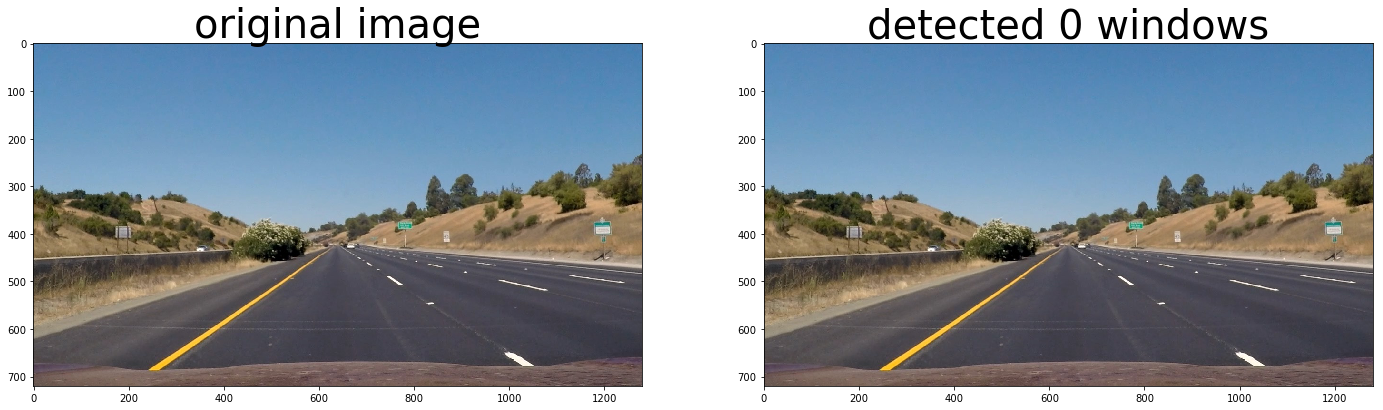

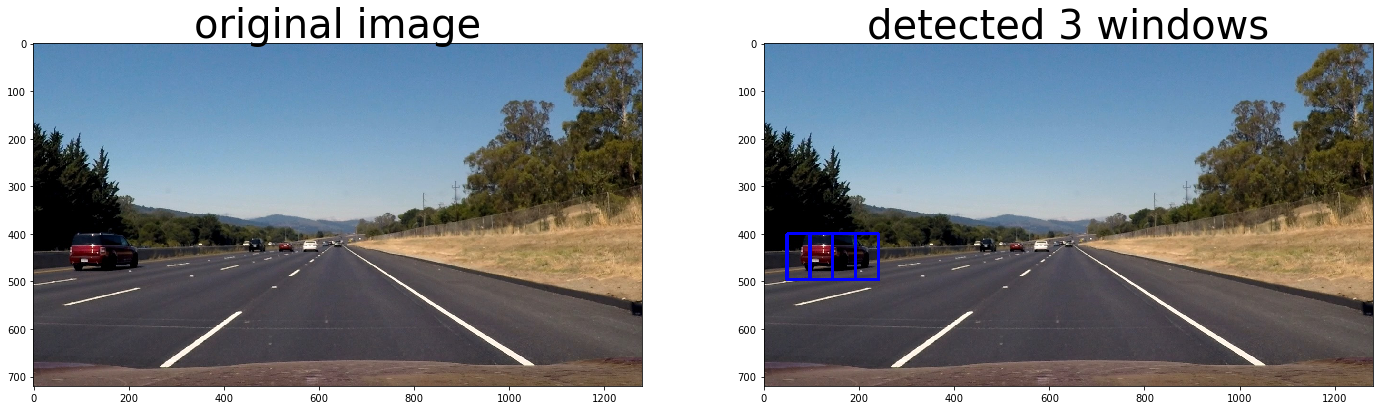

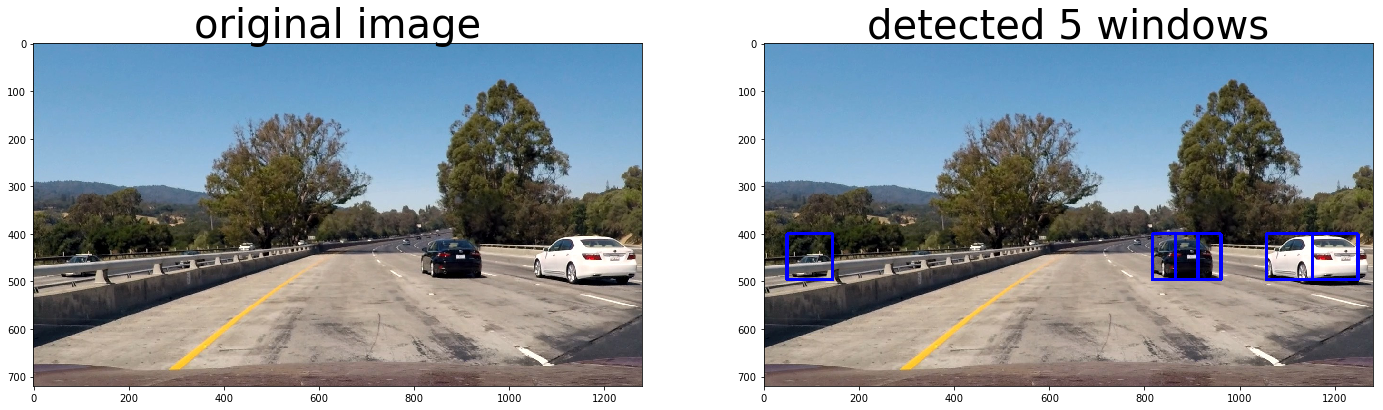

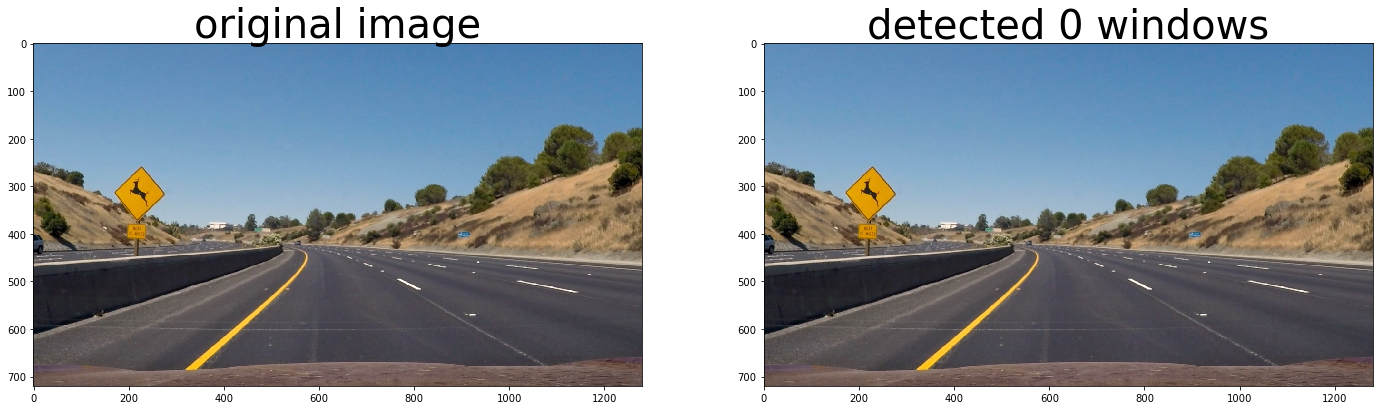

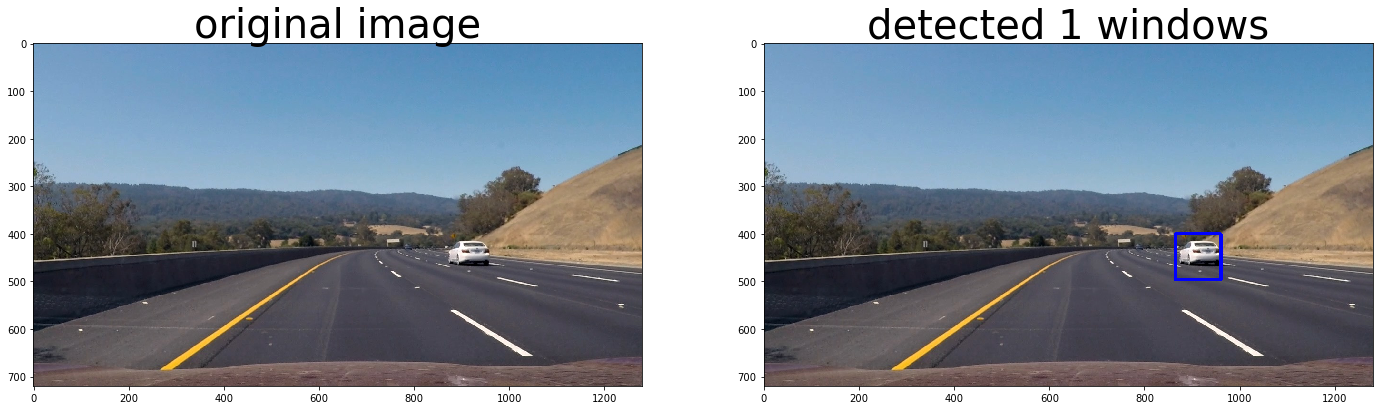

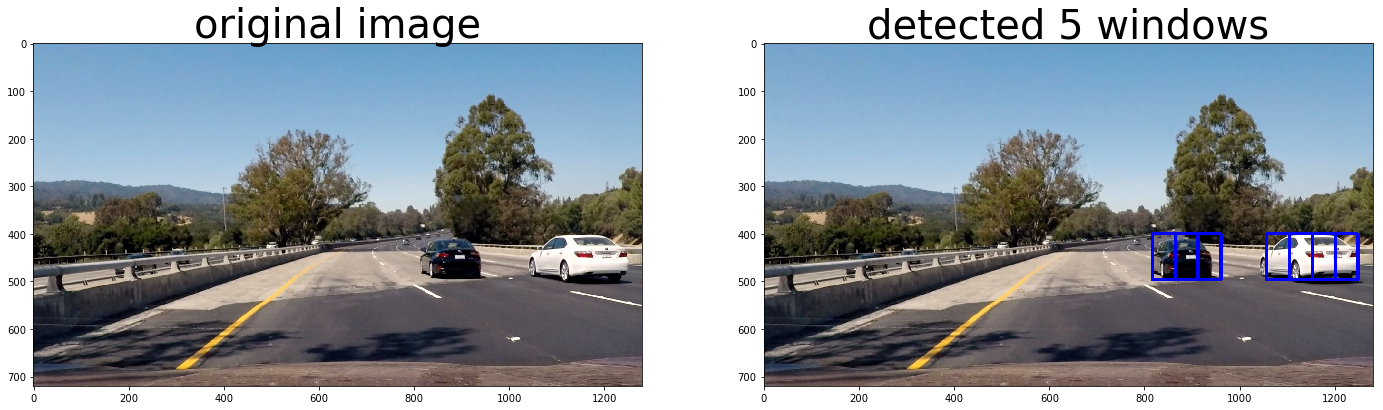

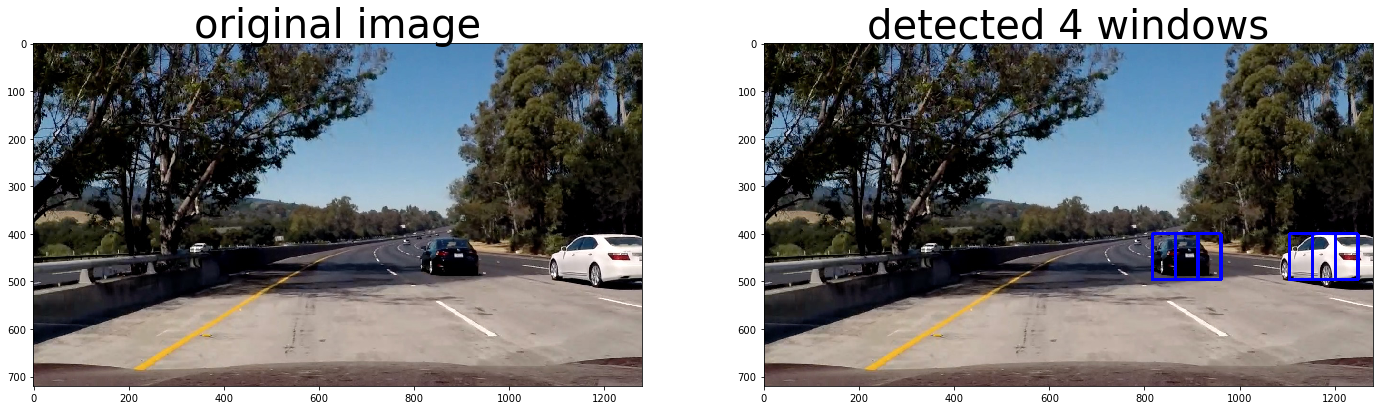

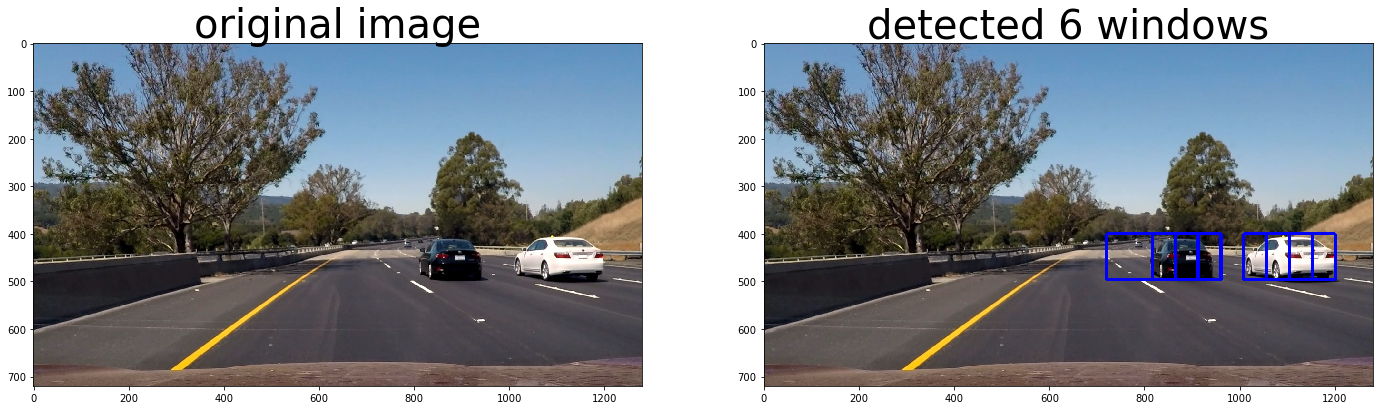

done


In [5]:
# Pull in test Image
image = mpimg.imread('media/test_images/test3.jpg')

# Load the data and trained model weights
scaled_data = pickle.load(open(fname,'rb'))
svc = pickle.load(open('svc.pickle','rb'))    
X_scaler = scaled_data["X_scaler"]

ystart = 400
ystop = 656
scale = 1.5

test_img = mpimg.imread('media/test_images/test1.jpg')

#rectangles = find_cars(test_img, ystart, ystop, scale, colorspace, hog_channel, 
#                       svc, None, orient, pix_per_cell, cell_per_block, None, None)

input_directory = 'media/test_images/'
files = os.listdir(input_directory)
for file in files:
    filename,ext = os.path.splitext(file)
    if ext == '.jpg':
        image = mpimg.imread(input_directory + file)    

        
    rectangles = find_cars(image,ystart, ystop, scale, colorspace, 
                       hog_channel, svc, X_scaler, orient, pix_per_cell, 
                       cell_per_block, spatial_size, hist_bins)

    test_img_rects = draw_boxes(image, rectangles)

        
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(24,9))
    ax1.imshow(image)
    ax1.set_title('original image', fontsize=40)
    
    ax2.imshow(test_img_rects)
    ax2.set_title('detected '+ str(len(rectangles)) + ' windows', fontsize=40)
    plt.show()
print("done")
#print(win)



In [6]:

# test function above - find_cars
image = mpimg.imread('media/test_images/test3.jpg')

y_half = image.shape[0] // 2
y_end = image.shape[0] #- (y_half % 64)
ystart = [y_half,y_half+100]
ystop = [y_end-100, y_end]
scale = [1.6,2.2]
ystart = [400]
ystop = [700]
scale = [1.5]
point_scale_data = np.vstack((ystart,ystop,scale))
print(point_scale_data)
windows = search_with_multiscale_windows(image, colorspace, orient, pix_per_cell, cell_per_block, 
                                         point_scale_data, hog_channel, spatial_size, hist_bins=16)


print(windows)
print(len(windows))

[[ 400. ]
 [ 700. ]
 [   1.5]]
[((864, 400), (960, 496))]
1


Number of boxes:  78


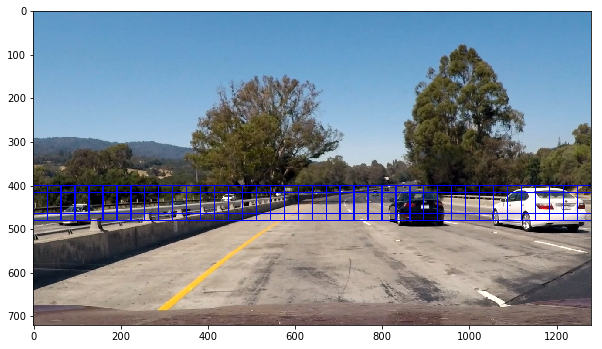

In [7]:
test_img = mpimg.imread('media/test_images/test1.jpg')

rects = []

ystart = 400
ystop = 464
scale = 1.0
rects.append(find_cars(test_img, int(ystart), int(ystop), scale, colorspace, 
                       hog_channel, svc, X_scaler, orient, pix_per_cell, 
                       cell_per_block, spatial_size, hist_bins, show_all_rectangles=True))

ystart = 416
ystop = 480
scale = 1.0
rects.append(find_cars(test_img, int(ystart), int(ystop), scale, colorspace, 
                       hog_channel, svc, X_scaler, orient, pix_per_cell, 
                       cell_per_block, spatial_size, hist_bins, show_all_rectangles=True))

rectangles = [item for sublist in rects for item in sublist] 
test_img_rects = draw_boxes(test_img, rectangles, thick=2)
plt.figure(figsize=(10,10))
plt.imshow(test_img_rects)
print('Number of boxes: ', len(rectangles))

...


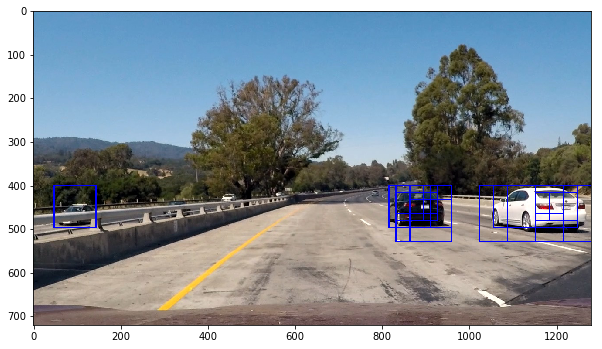

In [8]:
img = mpimg.imread('media/test_images/test1.jpg')

rects = []

y_start = (400,416,400,432,400,432,400,464)
y_stop = (464,480,496,528,528,560,596,660)
scale = (1.0,1.0,1.5,1.5,2.0,2.0,3.5,3.5)

for y_start,y_stop, scale in zip(y_start,y_stop,scale):
    rects.append(find_cars(img, int(y_start), int(y_stop), scale, colorspace, 
                 hog_channel, svc, X_scaler, orient, pix_per_cell, 
                 cell_per_block, spatial_size, hist_bins))
        
# apparently this is the best way to flatten a list of lists
rectangles = [item for sublist in rects for item in sublist] 
test_img_rects = draw_boxes(test_img, rectangles, thick=2)
plt.figure(figsize=(10,10))
plt.imshow(test_img_rects)
print('...')

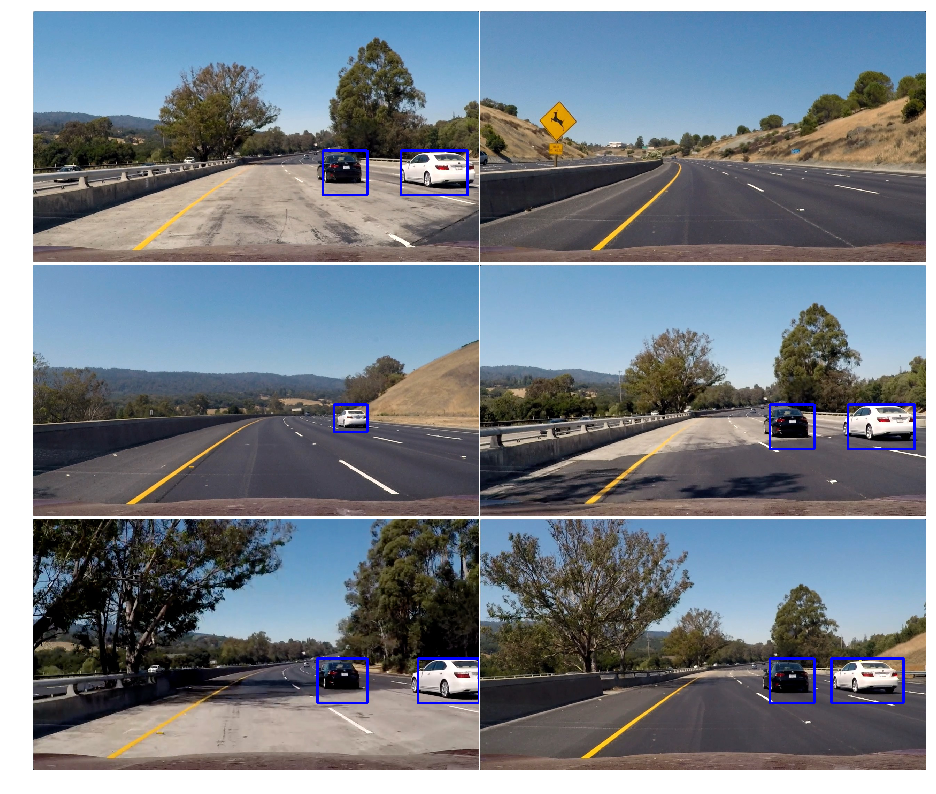

In [9]:


test_images = glob.glob('media/test_images/test*.jpg')

fig, axs = plt.subplots(3, 2, figsize=(16,14))
fig.subplots_adjust(hspace = .004, wspace=.002)
axs = axs.ravel()

for i, im in enumerate(test_images):
    axs[i].imshow(process_frame(mpimg.imread(im),colorspace, y_start, y_stop, scale, orient, pix_per_cell, 
                  cell_per_block, point_scale_data, hog_channel, spatial_size, hist_bins,
                  X_scaler, svc))
    axs[i].axis('off')

In [10]:

test_out_file2 = 'media/video_out_2_10_max_notCars_YcBc_len2_final.mp4'
clip1 = VideoFileClip('media/project_video.mp4')
#clip1 = VideoFileClip("media/project_video.mp4").subclip(15,31)
#myLambda = lambda img: process_video_2(img, a, b)

clip_test_out2 = clip1.fl_image(process_video_2)
#clip_test_out2 = process_video_2(img=clip1.fl_image,colorspace=colorspace,hog_channel=hog_channel,
#                                                svc=svc,X_scaler=X_scaler, orient=orient, pix_per_cell=pix_per_cell, 
#                                                cell_per_block=cell_per_block, spatial_size=spatial_size, hist_bins=hist_bins)



import random
if os.path.isfile(test_out_file2) == True:
    fname_split = test_out_file2.split('.')
    apx = random.random()
    fname_1 = fname_split[0] + str(apx) + '.' + fname_split[1]
    print('File exists, renaming to ' + fname_1)
    %time clip_test_out2.write_videofile(fname_1, audio=False)
else:
    %time clip_test_out2.write_videofile(test_out_file2, audio=False)


File exists, renaming to media/video_out_2_10_max_notCars_YcBc_len2_final0.09306281276832784.mp4
[MoviePy] >>>> Building video media/video_out_2_10_max_notCars_YcBc_len2_final0.09306281276832784.mp4
[MoviePy] Writing video media/video_out_2_10_max_notCars_YcBc_len2_final0.09306281276832784.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [19:37<00:00,  1.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: media/video_out_2_10_max_notCars_YcBc_len2_final0.09306281276832784.mp4 

Wall time: 19min 38s
